In [1]:
push!(LOAD_PATH, "../../lib/")

3-element Array{Any,1}:
 "/usr/local/share/julia/site/v0.6"
 "/usr/share/julia/site/v0.6"      
 "../../lib/"                      

In [2]:
using NaCsData
import NaCsCalc.Format: Unc

In [3]:
using LsqFit
using PyPlot

In [4]:
data_1700 = NaCsData.calc_survival("data/Full-1.7.csv");
data_0005 = NaCsData.calc_survival("data/Low-0.005.csv");

In [5]:
depth1 = 1.7 + 0.0005
depth2 = 0.005 + 0.0005
lower = depth2 / depth1

fitx = [data_1700[1] linspace(1, 1, length(data_1700[1]))
        data_0005[1] linspace(lower, lower, length(data_0005[1]))]
fity = [data_1700[2][:, 2]; data_0005[2][:, 2]];
fitw = [data_1700[3][:, 2]; data_0005[3][:, 2]];

In [6]:
len1 = length(data_1700[1]);

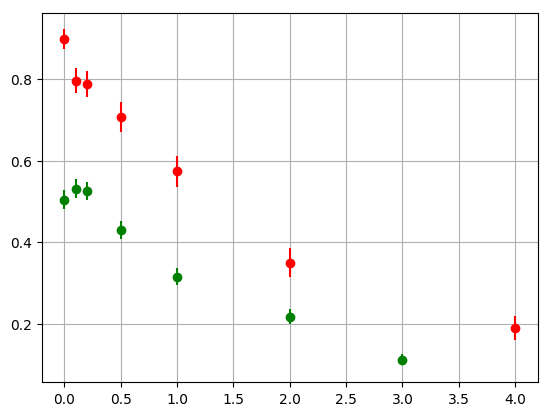

In [7]:
errorbar(fitx[1:len1, 1], fity[1:len1], fitw[1:len1], fmt="ro")
errorbar(fitx[(len1 + 1):end, 1], fity[(len1 + 1):end], fitw[(len1 + 1):end], fmt="go")
grid()

In [8]:
cdf_harmonic(x) = 1 - (1 + x + x.^2 ./ 2) .* exp(-x)

cdf_harmonic (generic function with 1 method)

In [9]:
function model(x, p)
    # t = x[:, 1]: wait time
    # α = x[:, 2]: lowering ratio (compare to initial trap depth)
    # y = p[1] * exp(-p[2] * t) * CDF(√(α) / (p[3] + p[4] * t))
    t = x[:, 1]
    α = x[:, 2]
    p[1] .* exp.(.-p[2] .* t) .* cdf_harmonic.(sqrt.(α) ./ (p[3] .+ p[4] .* t))
end

model (generic function with 1 method)

In [10]:
fit = curve_fit(model, fitx, fity, 1 ./ (fitw + 0.01), [0.9, 0.3, 0.1, 0.001]);

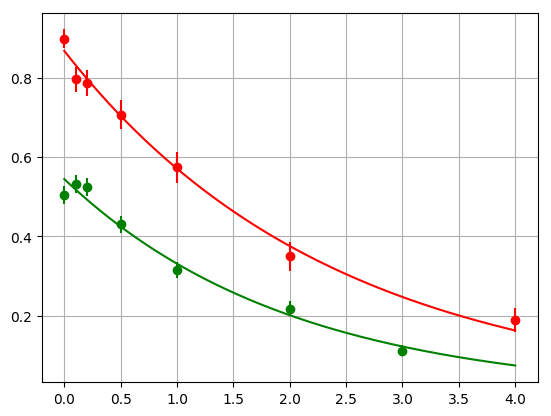

In [11]:
plotx = linspace(minimum(fitx[:, 1]), maximum(fitx[:, 1]), 1000)
param = fit.param

plot(plotx, model([plotx linspace(1, 1, 1000)], param), "r")
errorbar(fitx[1:len1, 1], fity[1:len1], fitw[1:len1], fmt="ro")
plot(plotx, model([plotx linspace(lower, lower, 1000)], param), "g")
errorbar(fitx[(len1 + 1):end, 1], fity[(len1 + 1):end], fitw[(len1 + 1):end], fmt="go")

grid()

In [12]:
sigma = estimate_errors(fit, 0.95)

4-element Array{Float64,1}:
 0.031488  
 0.0579319 
 0.00101558
 0.00144141

In [13]:
Unc.(fit.param, sigma)

4-element Array{NaCsCalc.Format.Unc{Float64},1}:
 0.868(31)  
 0.419(57)  
 1.76(10)e-2
 1.3(14)e-3 